Import Tensor flow and examine what version is currently loaded

Then we list all devices available to be used by TensorFlow, both CPU and GPU.

The look specifically at what GPU resources are available and print what device is currently being used.

In [8]:
import tensorflow as tf

# Print TensorFlow version (optional, for confirmation)
print("TensorFlow Version:", tf.__version__)

# List all available devices
print("All available devices:", tf.config.list_physical_devices())

# Specifically list GPU devices
gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

# Check if TensorFlow is currently using a GPU
if gpus:
    print("TensorFlow is currently using a GPU.")
else:
    print("TensorFlow is currently using a CPU.")


TensorFlow Version: 2.13.1
All available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is currently using a GPU.


In [36]:
# Dataset Preparation: Loading the MNIST dataset
import numpy as np
import pandas as pd


# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data: Normalize the pixel values to 0.0 to 1.0 for improved speed and stability
x_train, x_test = x_train / 255.0, x_test / 255.0

# Review the shape of the dataset to ensure it is what is expected
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Input Layer** - *Flatten* is the input layer, this doesn't perform any computation, but reshapes the data into a 28x28 array of pixels to be processed by followling layers

**Hidden Layer 1** - *Dense* has 128 neurons, and the relu (Rectivied Linear Unit) activation which is fully connected, all neurons receive input from all input features

**Hidden Layer 2** - *Dropout*, this is used to prevent overfitting, this sets 20% of the input units to 0 on each update.

**Output Layer** - *Dense*   This has 10 neurons to correlate to the 10 classes of the MNIST dataset.  The softmax is used for calculating the probability across the classes.

In [37]:
# Model Building
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # input layer
    tf.keras.layers.Dense(128, activation='relu'),  # hidden layer 1
    tf.keras.layers.Dropout(0.2),                   # hidden layer 2
    tf.keras.layers.Dense(10, activation='softmax') # output layer 
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {accuracy}")

# Results Analysis
# [Include a brief summary based on the output accuracy and loss]


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1446 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1068 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9763
313/313 - 1s - loss: 0.0719 - accuracy: 0.9773 - 614ms/epoch - 2ms/step
Test accuracy: 0.9772999882698059


In [11]:
#saving model
model.save('mnist_model.h5')

/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
from PIL import Image
from PIL import ImageOps
import numpy as np
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('mnist_model.h5')

# Load test image
image_path = 'test_image.jpg'
img = Image.open(image_path)

# Convert to grayscale and resize to match MNIST training data
img = img.convert('L')
img = img.resize((28, 28))

# Invert image colors if necessary (if your image has white digits on black background)
img = ImageOps.invert(img)

# Convert image to a numpy array
img_array = np.array(img)

# Normalize the image to match expected MNIST input
img_array = img_array / 255.0

# Reshape the image for the model for batch processing  [batch, height, width]
img_array = img_array.reshape(1, 28, 28)

# Make a prediction
prediction = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(prediction, axis=1)

# Get the confidence of the prediction
confidence_levels  = prediction[0]

# Print the results
predicted_class = np.argmax(confidence_levels)
confidence = confidence_levels[predicted_class]

print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


1/1 [==============================] - 0s 31ms/step
Predicted Class: 5, Confidence: 0.63


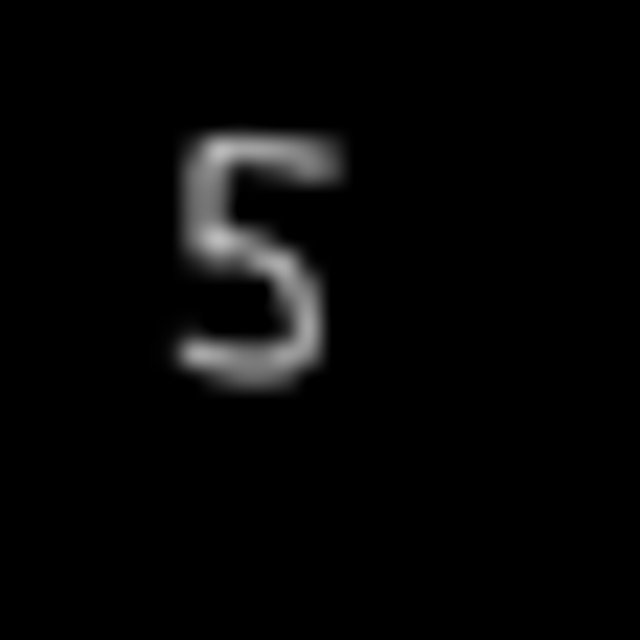

In [35]:
# Display the img variable to review how the model sees the image
img.resize((640, 640))